In [38]:
import pywt
def format_array(a):
    """Consistent array representation across different systems"""
    import numpy
    a = numpy.where(numpy.abs(a) < 1e-5, 0, a)
    return numpy.array2string(a, precision=5, separator=' ', suppress_small=True)

In [51]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
wp = pywt.WaveletPacket(data=x, wavelet='db1', mode='symmetric')
nodes=[node.path for node in wp.get_level(3, 'freq')]
print(nodes)

['aaa', 'aad', 'add', 'ada', 'dda', 'ddd', 'dad', 'daa']


In [53]:
new_wp = pywt.WaveletPacket(data=None, wavelet='db1', mode='symmetric')
for index in nodes:
    new_wp[index]=wp[index].data

print(new_wp.reconstruct(update=False))



[1. 2. 3. 4. 5. 6. 7. 8.]


In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
labels = ['Label_{}'.format(i) for i in range(1, 65)]
labels


['Label_1',
 'Label_2',
 'Label_3',
 'Label_4',
 'Label_5',
 'Label_6',
 'Label_7',
 'Label_8',
 'Label_9',
 'Label_10',
 'Label_11',
 'Label_12',
 'Label_13',
 'Label_14',
 'Label_15',
 'Label_16',
 'Label_17',
 'Label_18',
 'Label_19',
 'Label_20',
 'Label_21',
 'Label_22',
 'Label_23',
 'Label_24',
 'Label_25',
 'Label_26',
 'Label_27',
 'Label_28',
 'Label_29',
 'Label_30',
 'Label_31',
 'Label_32',
 'Label_33',
 'Label_34',
 'Label_35',
 'Label_36',
 'Label_37',
 'Label_38',
 'Label_39',
 'Label_40',
 'Label_41',
 'Label_42',
 'Label_43',
 'Label_44',
 'Label_45',
 'Label_46',
 'Label_47',
 'Label_48',
 'Label_49',
 'Label_50',
 'Label_51',
 'Label_52',
 'Label_53',
 'Label_54',
 'Label_55',
 'Label_56',
 'Label_57',
 'Label_58',
 'Label_59',
 'Label_60',
 'Label_61',
 'Label_62',
 'Label_63',
 'Label_64']

C:\Users\ariel\AppData\Local\Temp\ipykernel_6968\2401767291.py:5: RuntimeWarning: divide by zero encountered in scalar floor_divide
  tick_step = max(num_labels // num_ticks, 1)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

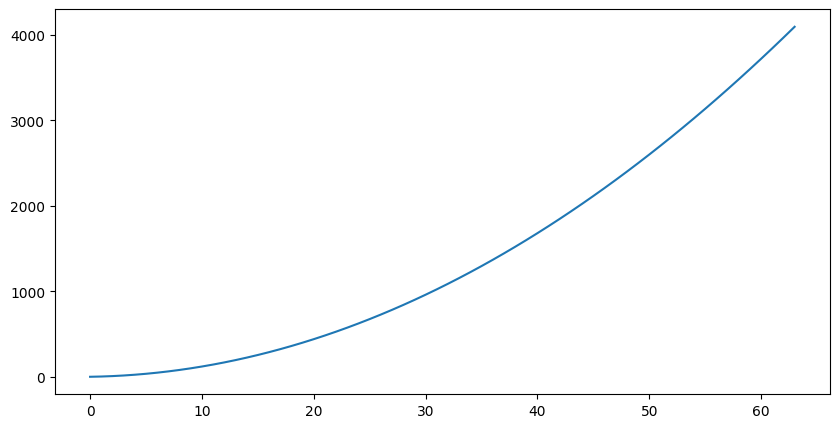

In [5]:
def custom_tick_locator(width):
    # Function to select the subset of tick locations based on the width of the plot
    num_labels = len(labels)
    num_ticks = width // 100  # Adjust the divisor based on your preference
    tick_step = max(num_labels // num_ticks, 1)
    return range(0, num_labels, tick_step)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust figsize as needed

# Plot your data (replace 'data' with your actual data)
data = [i**2 for i in range(1, 65)]
ax.plot(data)

# Get the current figure width
fig_width = fig.get_figwidth()

# Set the x-axis tick locator
ax.xaxis.set_major_locator(ticker.FixedLocator(custom_tick_locator(fig_width)))

# Set the tick labels using the subset of labels
ax.set_xticklabels([labels[i] for i in custom_tick_locator(fig_width)])

# Rotate the tick labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()